In [1]:
import pandas as pd
import os

df = pd.read_csv(os.path.join("results", 'results.csv'), index_col=0)
df.shape

(115, 9)

In [2]:
df2 = pd.read_csv(os.path.join("results", 'results_local2.csv'), index_col=0)

df2["total score"] = df2["accuracy"] + df2["completeness"] + df2["fluency"] + df2["conciseness"]

df2["total score (no conciseness)"] = df2["accuracy"] + df2["completeness"] + df2["fluency"]
df2_summary = df2[["accuracy", "completeness", "fluency", "conciseness", "total score", "total score (no conciseness)"]].describe()

df2_summary

,accuracy,completeness,fluency,conciseness,total score,total score (no conciseness)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.977778,1.644444,3.911111,3.813674,10.347007,6.533333
std,1.313181,1.207385,0.105409,0.121423,2.307967,2.262742
min,0.000000,0.000000,3.800000,3.626667,7.626667,4.000000
25%,0.000000,0.400000,3.800000,3.707937,8.208187,4.400000
50%,0.000000,2.000000,4.000000,3.822222,9.711111,6.000000
75%,2.400000,2.400000,4.000000,3.911111,11.907937,8.200000
max,3.200000,3.200000,4.000000,4.000000,14.022222,10.200000


In [3]:
df.head()

,dataset,total score,accuracy,completeness,fluency,conciseness,prompt,n_few_shot,n_bootstrapped_few_shot
0,housing_1.json,13.396078,4.0,4.0,3.2,2.196078,You are helping users understand an ML model's...,NaN,NaN
1,housing_1.json,13.274510,4.0,4.0,3.0,2.274510,You are helping users who do not have experien...,NaN,NaN
2,housing_1.json,14.010458,4.0,4.0,3.2,2.810458,You are helping users understand an ML model's...,NaN,NaN
3,housing_2.json,11.080000,4.0,4.0,2.6,0.480000,You are helping users understand an ML model's...,NaN,NaN
4,housing_2.json,11.160000,4.0,4.0,2.2,0.960000,You are helping users who do not have experien...,NaN,NaN


In [4]:
df["total score"] = df["accuracy"] + df["completeness"] + df["fluency"] + df["conciseness"]

df["total score (no conciseness)"] = df["accuracy"] + df["completeness"] + df["fluency"]

In [5]:
dataset_names = {"housing_1.json": "House 1",
                 "housing_2.json": "House 2",
                 "housing_3.json": "House 3",
                 "mushroom_1.json": "Mush 1",
                 "mushroom_2.json": "Mush 2",
                 "student_1.json": "Student 1",
                 "student_2.json": "Student 2",
                 "pdf_1.json": "PDF 1",
                 "pdf_2.json": "PDF 2"}

df['dataset'] = df['dataset'].map(dataset_names)

In [6]:
prompts_to_ids = {df['prompt'].unique()[0]: "Prompt 1", 
                  df['prompt'].unique()[1]: "Prompt 2",
                  df['prompt'].unique()[2]: "Prompt 3"}

df['prompt'] = df['prompt'].map(prompts_to_ids)

In [7]:
df["n_few_shot"].fillna(0, inplace=True)
df["n_bootstrapped_few_shot"].fillna(0, inplace=True)

df["n_few_shot"] = df["n_few_shot"].astype(int)
df["n_bootstrapped_few_shot"] = df["n_bootstrapped_few_shot"].astype(int)

df["n_few_shot"].fillna(0, inplace=True)
df["n_bootstrapped_few_shot"].fillna(0, inplace=True)
df.head()

,dataset,total score,accuracy,completeness,fluency,conciseness,prompt,n_few_shot,n_bootstrapped_few_shot,total score (no conciseness)
0,House 1,13.396078,4.0,4.0,3.2,2.196078,Prompt 1,0,0,11.2
1,House 1,13.274510,4.0,4.0,3.0,2.274510,Prompt 2,0,0,11.0
2,House 1,14.010458,4.0,4.0,3.2,2.810458,Prompt 3,0,0,11.2
3,House 2,11.080000,4.0,4.0,2.6,0.480000,Prompt 1,0,0,10.6
4,House 2,11.160000,4.0,4.0,2.2,0.960000,Prompt 2,0,0,10.2


In [8]:
column_names = {"dataset": "Dataset",
                "prompt": "Prompt",
                "n_few_shot": "$L$",
                "n_bootstrapped_few_shot": "$B$",
                "accuracy": "Accuracy",
                "completeness": "Completeness",
                "fluency": "Fluency",
                "conciseness": "Conciseness",
                "total score": "Total score"}

df = df.rename(columns=column_names)
df = df[["Dataset", "Prompt", "$L$", "$B$", "Accuracy", "Completeness", "Fluency", "Conciseness", "Total score"]]

# round all scores to 3 decimal places
df = df.round(3)

df.to_csv(os.path.join("results", "cleaned_results.csv"))

df.head()

,Dataset,Prompt,$L$,$B$,Accuracy,Completeness,Fluency,Conciseness,Total score
0,House 1,Prompt 1,0,0,4.0,4.0,3.2,2.196,13.396
1,House 1,Prompt 2,0,0,4.0,4.0,3.0,2.275,13.275
2,House 1,Prompt 3,0,0,4.0,4.0,3.2,2.810,14.010
3,House 2,Prompt 1,0,0,4.0,4.0,2.6,0.480,11.080
4,House 2,Prompt 2,0,0,4.0,4.0,2.2,0.960,11.160


In [9]:
import os

# BY TECHNIQUE WITH STD DEV

def make_table(df_, groupby, filename):
    # Group by the specified columns and calculate both mean and standard deviation
    df_mean = df_.groupby(groupby).agg({
        "Accuracy": "mean", 
        "Completeness": "mean", 
        "Fluency": "mean", 
        "Conciseness": "mean", 
        "Total score": "mean"
    }).reset_index()
    
    df_std = df_.groupby(groupby).agg({
        "Accuracy": "std", 
        "Completeness": "std", 
        "Fluency": "std", 
        "Conciseness": "std", 
        "Total score": "std"
    }).reset_index()
    
    # Combine mean and standard deviation into the desired format: mean (std)
    for column in ["Accuracy", "Completeness", "Fluency", "Conciseness", "Total score"]:
        df_mean[column] = df_mean[column].apply(lambda x: f"{x:.3f}") + " $\pm$ " + df_std[column].apply(lambda x: f"{x:.2f}")
    
    # Function to bold the maximum value in each column
    def bold_max_in_column(df__, columns):
        for col in columns:
            # Extract the numeric part of the mean (before the " $\pm$ " part)
            df_means = df__[col].apply(lambda x: float(x.split(" $\pm$ ")[0]))
            # Find the maximum value in the column
            max_value = df_means.max()
            # Bold the cell that contains the maximum value
            df__[col] = df__.apply(lambda row: f"\\textbf{{{row[col]}}}" if float(row[col].split(" $\pm$ ")[0]) == max_value else row[col], axis=1)
        return df__
    
    # Apply the bolding function to the specified columns
    columns_to_check = ["Accuracy", "Completeness", "Fluency", "Conciseness", "Total score"]
    df_mean = bold_max_in_column(df_mean, columns_to_check)
    
    # Save to CSV and LaTeX
    df_mean.to_csv(os.path.join("results", f"{filename}.csv"), index=False)
    df_mean.to_latex(
        buf=os.path.join("results", f"{filename}.tex"), 
        index=False, 
        escape=False,  # escape=False allows LaTeX formatting (like parentheses) to be preserved
        caption="Overall results for each prompt and few-shot setting."
    )
    
make_table(df, ["Prompt", "$L$", "$B$"], "results_by_technique")


In [10]:
df_with_examples = df[df["$L$"] > 0]
make_table(df_with_examples, ["Dataset"], "results_by_dataset")

,# of Narratives,Metric,Value
0,0,Accuracy,4.0
1,0,Accuracy,4.0
2,0,Accuracy,4.0
3,0,Accuracy,4.0
4,0,Accuracy,4.0


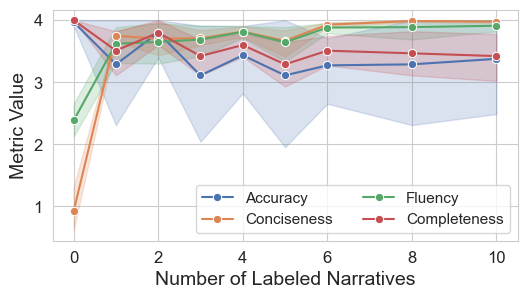

In [11]:
# plot number of L+B in df_by_technique versus each metrics
import matplotlib.pyplot as plt
import seaborn as sns

df["# of Narratives"] = df["$L$"] + df["$B$"]

df_melted = df.melt(id_vars=["# of Narratives"], 
                    value_vars=["Accuracy", "Conciseness", "Fluency", "Completeness"],
                    var_name="Metric", 
                    value_name="Value")
# df_melted = df.melt(id_vars=["$L$", "$B$"], 
#                     value_vars=["Accuracy", "Conciseness", "Fluency", "Completeness"],
#                     var_name="Metric", 
#                     value_name="Value")
display(df_melted.head())

# Create the line plot
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11
})

# Create the line plot with adjusted figure size
plt.figure(figsize=(6, 3))

sns.lineplot(data=df_melted, x="# of Narratives", y="Value", hue="Metric", marker="o", palette="deep", err_style="band")

plt.legend(title=None, ncol=2)

# Add title and labels
# plt.title("Metric Scores vs # of Narratives")
plt.xlabel("Number of Labeled Narratives")
plt.ylabel("Metric Value")

# Show the plot
plt.savefig(os.path.join("results", "metrics_over_narratives.png"), bbox_inches="tight")
plt.show()


In [12]:
sns.lineplot(data=df_melted, x="$B$", y="Value", hue="Metric", marker="o", palette="deep", err_style="band")

ValueError: Could not interpret value `$B$` for `x`. An entry with this name does not appear in `data`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

sns.set_theme(style="white")

# Define metrics and figure setup
metrics = ["Accuracy", "Completeness", "Fluency", "Conciseness"]

# Adjust the figsize to shrink the heatmaps
fig, axes = plt.subplots(1, 4, figsize=(12, 3))  # Make the heatmaps smaller

# Create a shared colorbar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position the colorbar axis

# Loop through the metrics and create heatmaps
for i, metric in enumerate(metrics):
    ax = axes[i]  # Determine subplot position in 2x2 grid
    df_pivot = df.pivot_table(index="$L$", columns="$B$", values=metric, aggfunc="mean")
    
    # Create heatmap with color range from 2 to 4, with white borders around the cells
    heatmap = sns.heatmap(df_pivot, cmap='Blues', vmin=2, vmax=4, ax=ax, 
                          cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=False,
                          linewidths=.5, linecolor='white')  # Added white borders with linewidth
    
    # Invert y-axis to have 0 at the bottom and 5 at the top
    ax.invert_yaxis()
    
    # Set labels and title with larger font sizes
    ax.set_xlabel('$B$', fontsize=12)
    ax.set_ylabel('$L$', fontsize=12)  # Only label y-axis for first subplot
    ax.set_title(metric, fontsize=14)
    
    # Add black border around each heatmap
    # Add a rectangle patch around each heatmap
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', lw=.5,
                           transform=ax.transAxes, clip_on=False))

# Modify the colorbar (only applied to the first heatmap)
cbar = heatmap.figure.colorbar(heatmap.collections[0], cax=cbar_ax)
cbar.set_ticks([2, 3, 4])  # Set ticks to 2, 3, and 4
cbar.set_ticklabels([2, 3, 4])  # Ensure only 2, 3, and 4 are labeled

# Adjust layout for a cleaner look and room for colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.savefig(os.path.join("results", "heatmap_metrics.png"), bbox_inches="tight")
plt.show()


C:\Users\Ola\AppData\Local\Temp\ipykernel_23076\692860619.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


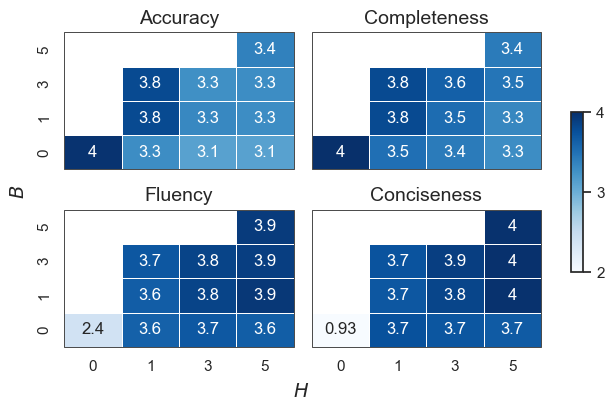

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

sns.set_theme(style="white")

# Define metrics and figure setup
metrics = ["Accuracy", "Completeness", "Fluency", "Conciseness"]

# Adjust the figsize to shrink the heatmaps
fig, axes = plt.subplots(2, 2, figsize=(6, 4), sharex="col", sharey="row")  # Make the heatmaps smaller

# Create a shared colorbar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position the colorbar axis

# Loop through the metrics and create heatmaps
for i, metric in enumerate(metrics):
    ax = axes[i//2][i%2]  # Determine subplot position in 2x2 grid
    df_pivot = df.pivot_table(index="$B$", columns="$L$", values=metric, aggfunc="mean")
    
    # Create heatmap with color range from 2 to 4, with white borders around the cells
    heatmap = sns.heatmap(df_pivot, cmap='Blues', vmin=2, vmax=4, ax=ax, 
                          cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True,
                          linewidths=.5, linecolor='white')  # Added white borders with linewidth
    
    # Invert y-axis to have 0 at the bottom and 5 at the top
    ax.invert_yaxis()
    
    # Set the titles
    ax.set_title(metric, fontsize=14)
    
    # Remove x and y labels and ticks from all but the bottom left heatmap
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False, bottom=False)
    
    # Add black border around each heatmap
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', lw=.5,
                           transform=ax.transAxes, clip_on=False))

# Add a single set of axis labels centered on the figure
fig.text(0.47, 0.0, '$H$', ha='center', va='center', fontsize=14)
fig.text(0.00, 0.5, '$B$', ha='center', va='center', rotation='vertical', fontsize=14)

# Modify the colorbar (only applied to the first heatmap)
cbar = heatmap.figure.colorbar(heatmap.collections[0], cax=cbar_ax)
cbar.set_ticks([2, 3, 4])  # Set ticks to 2, 3, and 4
cbar.set_ticklabels([2, 3, 4])  # Ensure only 2, 3, and 4 are labeled

# Adjust layout for a cleaner look and room for colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar

plt.savefig(os.path.join("results", "heatmap_metrics_tight.png"), bbox_inches="tight")
plt.show()
